In [1]:
import numpy as np
from maze import Maze, plot_action_values, plot_policy
import matplotlib.pyplot as plt

In [2]:
env = Maze()


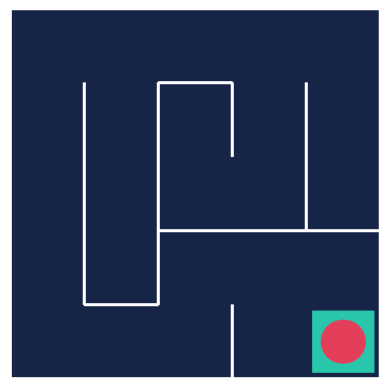

In [3]:
frame = env.render(mode = 'rgb_array')
plt.axis('off')
plt.imshow(frame)

In [4]:
print(f'Observation space: {env.observation_space.nvec}')
print(f'Number of action: {env.action_space.n}')

Observation space: [5 5]
Number of action: 4


In [5]:
action_values = np.zeros(shape = (5,5,4))

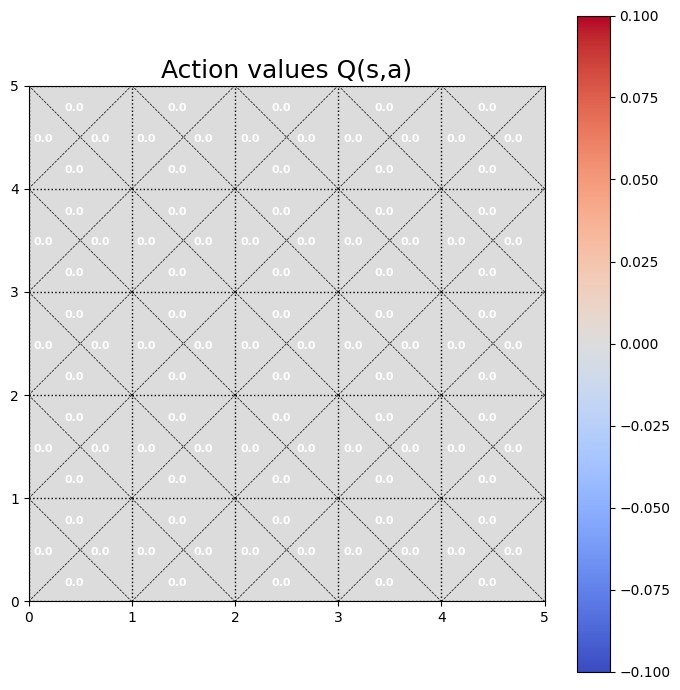

In [6]:
plot_action_values(action_values)

In [17]:
import random
def policy(state, epsilon=0.):
    if random.random()<epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [18]:
action = policy((0,0))
print(f'ACtion in state (0,0): {action}')

ACtion in state (0,0): 3


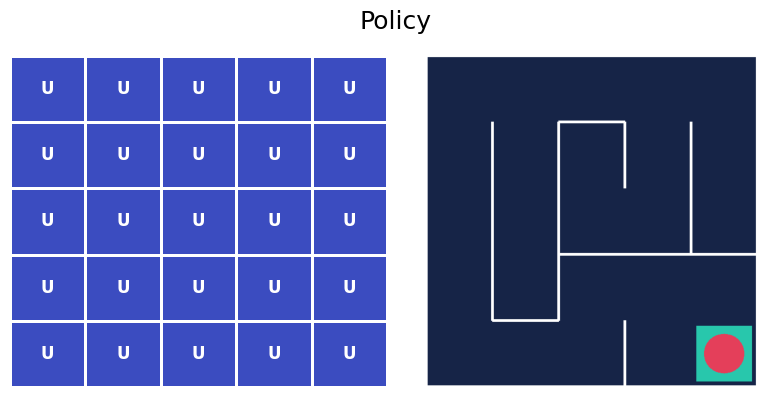

In [19]:
plot_policy(action_values, frame)

In [22]:
def on_policy_alpha(policy, action_values,episodes, gamma = 0.99, epsilon = 0.2, alpha = 0.1):
    for episodes in range(1, episodes+1):
        state = env.reset()
        done = False
        transition = []

        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transition.append([state,action,reward])
            state = next_state
        G = 0
        for (state_t, action_t, reward_t) in reversed(transition):
            G = reward_t + gamma * G
            action_values[state_t][action_t] += alpha * (G - action_values[state_t][action_t])
        


In [23]:
on_policy_alpha(policy, action_values, episodes = 10000)

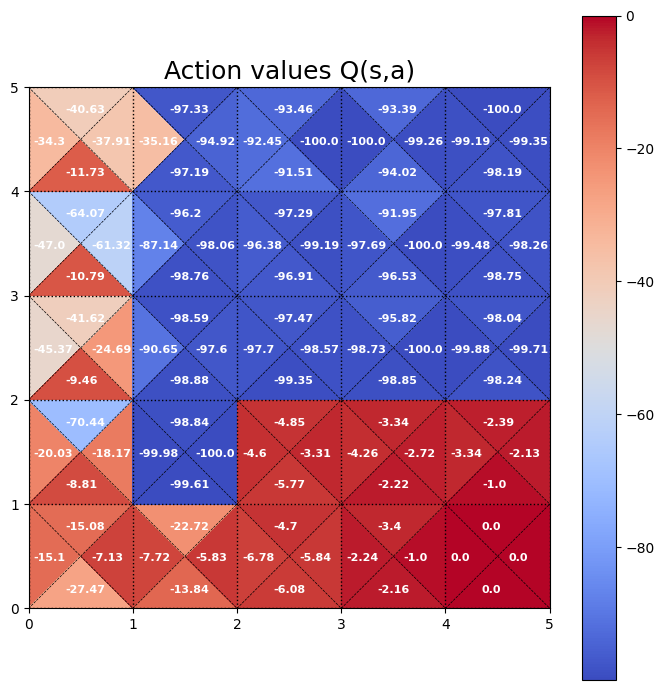

In [24]:
plot_action_values(action_values)

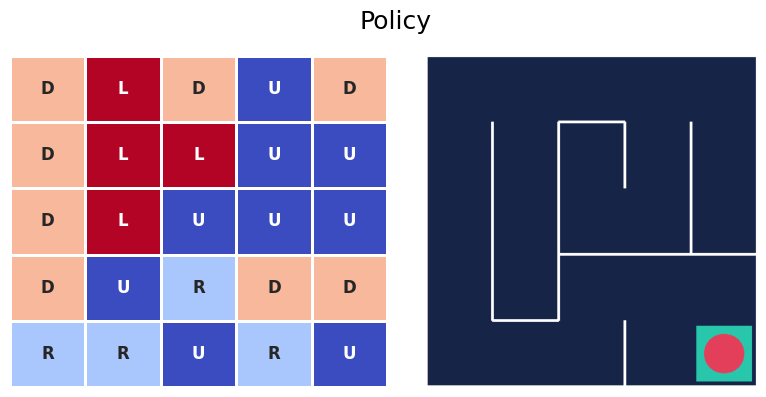

In [25]:
plot_policy(action_values,frame)

In [26]:
test_agent(env, policy)

C:\Users\hebli\AppData\Local\Temp\ipykernel_20648\1666327301.py:215: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use(orig_backend)
